## Lab Session 

### Learning Objective:
- Working with data using python libaries.
- Data Visualization.
- Exploratory data analysis and data preprocessing.
- Building a Linear regression model to predict the tip amount based on different input features.

### About the dataset (Customer Tip Data)

#### Dataset Source: https://www.kaggle.com/datasets/ranjeetjain3/seaborn-tips-dataset

The dataset contains information about the 244 orders served at a restaurant in the United States. Each observation includes the factors related to the order like total bill, time, the total number of people in a group, gender of the person paying for the order and so on.

#### Attribute Information:

- **total_bill:** Total bill (cost of the meal), including tax, in US dollars
- **tip:** Tip in US dollars
- **sex:** Sex of person paying for the meal
- **smoker:** There is a smoker in a group or not
- **day:** Day on which the order is served
- **time:** Time of the order
- **size:** Size of the group

Food servers’ tips in restaurants may be influenced by many factors, including the nature of the restaurant, size of the party, and table locations in the restaurant. Restaurant managers need to know which factors matter when they assign tables to food servers. For the sake of staff morale, they usually want to avoid either the substance or the appearance of unfair
treatment of the servers, for whom tips (at least in restaurants in the UnitedStates) are a major component of pay.

### Import required libraries

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

### Load the dataset

In [2]:
tips = sns.load_dataset("tips")

### 1. Make a list of categorical and numerical columns in the data.

In [3]:
df=tips

In [4]:
df_series=df.dtypes

In [5]:
df_series

total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object

### 2. Compute the average bill amount for each day.

In [6]:
df.groupby("day")['total_bill'].mean()

day
Thur    17.682742
Fri     17.151579
Sat     20.441379
Sun     21.410000
Name: total_bill, dtype: float64

### 3. Which gender is more generous in giving tips?

In [7]:
df.groupby('sex')['tip'].mean()

sex
Male      3.089618
Female    2.833448
Name: tip, dtype: float64

### 4. According to the data, were there more customers for dinner or lunch?

In [8]:
tips.groupby('time')['size'].sum()

time
Lunch     164
Dinner    463
Name: size, dtype: int64

### 5. Based on the statistical summary, comment on the variable 'tip'

In [9]:
df.describe().tip

count    244.000000
mean       2.998279
std        1.383638
min        1.000000
25%        2.000000
50%        2.900000
75%        3.562500
max       10.000000
Name: tip, dtype: float64

### 6. Find the busiest day in terms of the orders?

In [10]:
tips['day'].value_counts()

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

In [11]:
tips.groupby('day').size()

day
Thur    62
Fri     19
Sat     87
Sun     76
dtype: int64

### 7. Is the variable 'total_bill' skewed? If yes, identify the type of skewness. Support your answer with a plot

In [12]:
df['total_bill'].skew()

1.1332130376158205

C:\Users\kiran\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<function matplotlib.pyplot.show(close=None, block=None)>

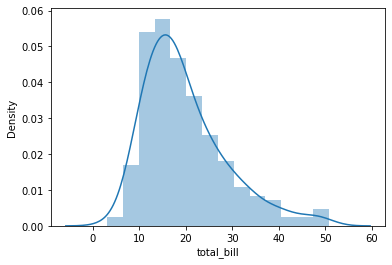

In [13]:
sns.distplot(df['total_bill'])
plt.show

Right skewed

### 8. Is the tip amount dependent on the total bill? Visualize the relationship with a appropriate plot and metric and write your findings.

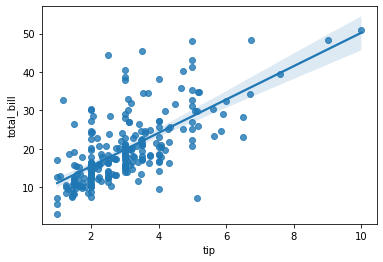

In [14]:
sns.regplot(x='tip',y='total_bill',data=df)
plt.show()

### 9. What is the percentage of males and females in the dataset? and display it in the plot

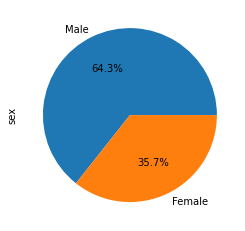

In [15]:
tips['sex'].value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.show()

### 10. Compute the gender-wise count based on smoking habits and display it in the plot

In [16]:
df.groupby('sex')['smoker'].value_counts()

sex        
Male    No     97
        Yes    60
Female  No     54
        Yes    33
Name: smoker, dtype: int64

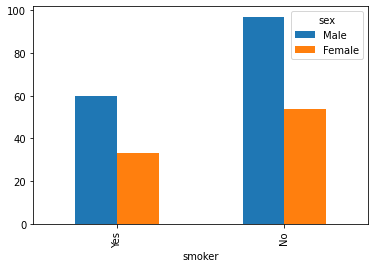

In [17]:
pd.crosstab(df['smoker'],df['sex']).plot(kind='bar')
plt.show()

### 11. Compute the average tip amount given for different days and display it in the plot.

,day,tip
0,Thur,2.771452
1,Fri,2.734737
2,Sat,2.993103
3,Sun,3.255132


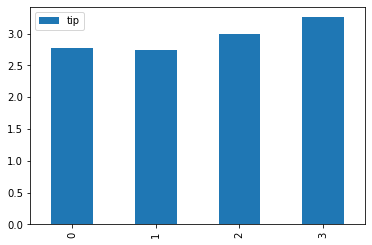

In [24]:
tips_daytip=tips.groupby('day')['tip'].mean().reset_index()
tips_daytip.plot(kind='bar')
tips_daytip

### 12. Is the average bill amount dependent on the size of the group? Visualize the relationship using appropriate plot and write your findings.

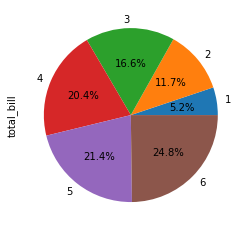

In [25]:
tips.groupby('size')['total_bill'].mean().plot(kind='pie',autopct='%1.1f%%')
plt.show()

### 13. Plot a horizontal boxplot to compare the bill amount based on gender

<AxesSubplot:xlabel='total_bill', ylabel='sex'>

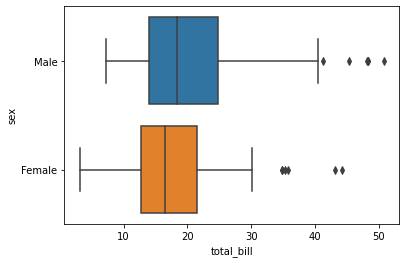

In [26]:
sns.boxplot(x=tips["total_bill"],y=tips["sex"],orient="h")

### 14. Find the maximum bill amount for lunch and dinner on Saturday and Sunday

In [27]:
x=tips.groupby('day')['total_bill'].max()

In [28]:
x.loc[['Sat','Sun']]

day
Sat    50.81
Sun    48.17
Name: total_bill, dtype: float64

### 15. Compute the percentage of missing values in the dataset.

In [29]:
tips.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

### 16. Is there are any duplicate records in the dataset? If yes compute the count of the duplicate records and drop them.

In [30]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
239    False
240    False
241    False
242    False
243    False
Length: 244, dtype: bool

In [31]:
df.duplicated().sum()

1

In [32]:
df_final=df.drop_duplicates()

### 17. Is there are any outliers present in the column 'total_bill'? If yes treat them with transformation approach, and plot a boxplot before and after the treatment

C:\Users\kiran\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


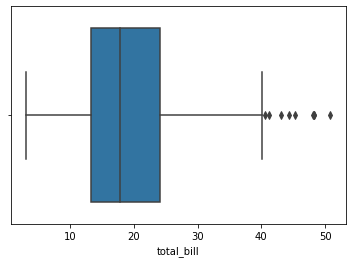

In [33]:
sns.boxplot(df['total_bill'])
plt.show()

C:\Users\kiran\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


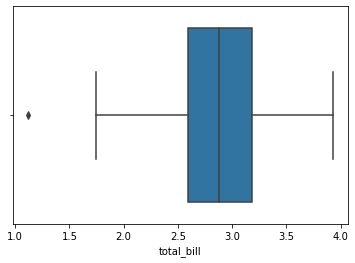

In [37]:
bill_log=np.log(df['total_bill'])
sns.boxplot(bill_log)
plt.show()

### 18. Is there are any outliers present in the column 'tip'? If yes remove them using IQR techinque.

C:\Users\kiran\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


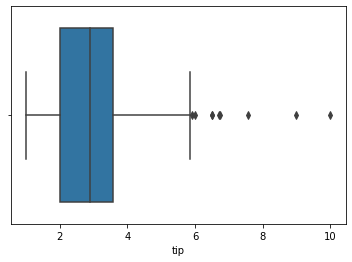

In [39]:
sns.boxplot(df['tip'])
plt.show()

In [40]:
Q1=df['tip'].quantile(0.25)
Q3=df['tip'].quantile(0.75)
IQR=Q3-Q1
print(Q1)
print(Q3)
print(IQR)


2.0
3.5625
1.5625


In [41]:
lower_whisker=Q1-(1.5*IQR)
upper_whisker=Q3+(1.5*IQR)


In [42]:
df_out=df.loc[(df['tip']<upper_whisker)&(df['tip']>lower_whisker)]

C:\Users\kiran\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


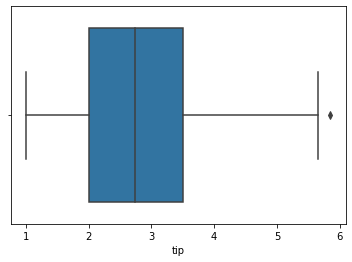

In [43]:
sns.boxplot(df_out['tip'])
plt.show()

### 19. Encode the categorical columns in the dataset and print the random 5 samples from the dataframe.

In [18]:
tips=pd.get_dummies(tips,drop_first=True)
tips.sample(5)

,total_bill,tip,size,sex_Female,smoker_No,day_Fri,day_Sat,day_Sun,time_Dinner
213,13.27,2.50,2,1,0,0,1,0,1
232,11.61,3.39,2,0,1,0,1,0,1
84,15.98,2.03,2,0,1,0,0,0,0
142,41.19,5.00,5,0,1,0,0,0,0
76,17.92,3.08,2,0,0,0,1,0,1


### 20. Check the range of the column 'total_bill' and transform the values such that the range will be 1.

In [44]:
tb_max=tips['total_bill'].max()
tb_min=tips['total_bill'].min()
range_=tb_max-tb_min
print(range_)
from sklearn.preprocessing import MinMaxScaler
mm=MinMaxScaler()
tips['total_bill_mm']=mm.fit_transform(tips[['total_bill']])
tb_mm_max=tips['total_bill_mm'].max()
tb_mm_min=tips['total_bill_mm'].min()
range_=tb_mm_max-tb_mm_min
print(range_)

47.74
0.9999999999999999


### 21. Load the dataset again by giving the name of the dataframe as "tips_df"
- i) Encode the categorical variables.
- ii) Store the target column (i.e.tip) in the y variable and the rest of the columns in the X variable

In [45]:
tips_df=tips

In [46]:
tips_df=pd.get_dummies(tips_df,drop_first=True)

In [47]:
X=tips_df.drop(['tip'],axis=1)

In [48]:
y=tips_df['tip']

### 22. Split the dataset into two parts (i.e. 70% train and 30% test), and Standardize the columns "total_bill" and "Size" using the mim_max scaling approach

In [49]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=1)
from sklearn.preprocessing import MinMaxScaler

min_max=MinMaxScaler()

tips_scaled1=tips_df.copy()

tips_scaled1.iloc[:,[0,2]]=min_max.fit_transform(tips_scaled1.iloc[:,[0,2]])
tips_scaled1.head()

,total_bill,tip,size,total_bill_mm,sex_Female,smoker_No,day_Fri,day_Sat,day_Sun,time_Dinner
0,0.291579,1.01,0.2,0.291579,1,1,0,0,1,1
1,0.152283,1.66,0.4,0.152283,0,1,0,0,1,1
2,0.375786,3.50,0.4,0.375786,0,1,0,0,1,1
3,0.431713,3.31,0.2,0.431713,0,1,0,0,1,1
4,0.450775,3.61,0.6,0.450775,1,1,0,0,1,1


### 23. Train a linear regression model using the training data and print the r_squared value of the prediction on the test data.

In [ ]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)
lr.predict(X_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

### Happy Learning:)